In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.cm as cm
from numba import jit
import sys
sys.path.append('../')


In [2]:
df = pd.read_csv("../../data/raw/trial3_fish1.csv")
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'NEIGHBOR_DISTANCE (cm)',
       'SPEED#wcentroid (cm/s)', 'SPEED#smooth#wcentroid (cm/s)',
       'VX#wcentroid (cm/s)', 'VY#wcentroid (cm/s)', 'X#wcentroid (cm)',
       'Y#wcentroid (cm)', 'time#centroid'],
      dtype='object')

In [3]:
df[np.isinf(df)].count()

frame                                  0
ACCELERATION#wcentroid (cm/s2)        29
ANGLE#wcentroid                       29
ANGULAR_A#centroid                    29
ANGULAR_V#centroid                    29
BORDER_DISTANCE#wcentroid (cm)        29
NEIGHBOR_DISTANCE (cm)            365641
SPEED#wcentroid (cm/s)                29
SPEED#smooth#wcentroid (cm/s)         29
VX#wcentroid (cm/s)                   29
VY#wcentroid (cm/s)                   29
X#wcentroid (cm)                      29
Y#wcentroid (cm)                      29
time#centroid                         29
dtype: int64

In [4]:
df.drop(['NEIGHBOR_DISTANCE (cm)'], axis=1, inplace=True)
num_frames = len(df)
time_original = df['time#centroid']
df['time'] = pd.Series(np.array(df.index)/100.0, index=df.index)
df = df.replace([-np.inf, np.inf], np.nan).dropna()

In [5]:
(np.ediff1d(time_original) > (0.01 + 0.001)).sum()

/home/lukas/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:86: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]
/home/lukas/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


10

In [6]:
np.ediff1d(time_original)

/home/lukas/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:86: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


array([ 0.01    ,  0.010001,  0.01    , ...,  0.010009,  0.01001 ,
        0.009766])

In [7]:
np.mean((df['time#centroid'] - df['time']))

0.06308031361647132

In [8]:
len(df)/time_original.values[-1]

99.988853140303434

In [9]:
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'SPEED#wcentroid (cm/s)',
       'SPEED#smooth#wcentroid (cm/s)', 'VX#wcentroid (cm/s)',
       'VY#wcentroid (cm/s)', 'X#wcentroid (cm)', 'Y#wcentroid (cm)',
       'time#centroid', 'time'],
      dtype='object')

In [13]:
df['SPEED#wcentroid (cm/s)'].min()

0.0

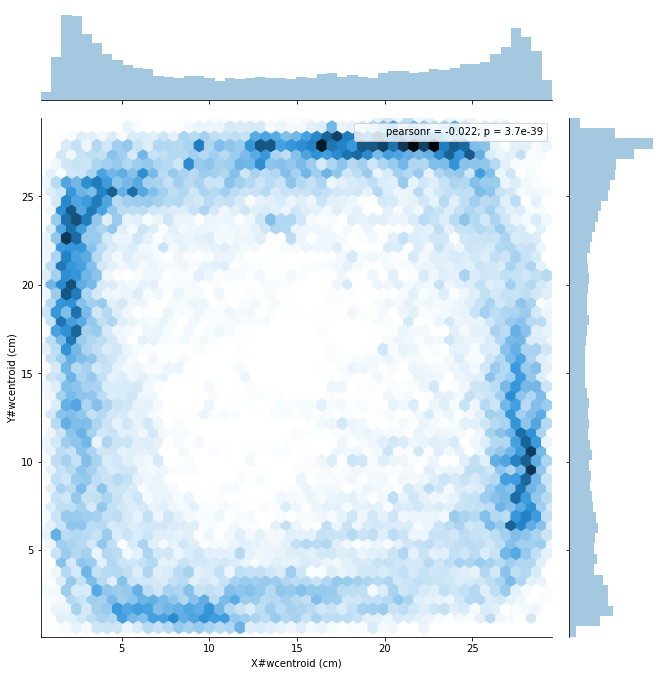

In [10]:
# Look at the density of the position.
x = df['X#wcentroid (cm)']
y = df['Y#wcentroid (cm)']
fig = sns.jointplot(x,y, kind='hex')
fig.fig.set_figwidth(10)
fig.fig.set_figheight(10)

In [11]:
np.min(x), np.max(x), np.min(y), np.max(y)

(0.38907027240000003,
 29.537338259999999,
 0.091914162039999997,
 29.440130230000001)

In [12]:
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'SPEED#wcentroid (cm/s)',
       'SPEED#smooth#wcentroid (cm/s)', 'VX#wcentroid (cm/s)',
       'VY#wcentroid (cm/s)', 'X#wcentroid (cm)', 'Y#wcentroid (cm)',
       'time#centroid', 'time'],
      dtype='object')

In [6]:
kicks = pd.read_csv('../../data/processed/kicks_guy.csv')
kicks.columns

Index(['fish_id', 'heading_change', 'duration', 'length', 'max_vel',
       'neighbor_distance', 'neighbor_angle', 'geometric_leader',
       'viewing_angle_ltf', 'viewing_angle_ftl', 'rel_orientation',
       'wall_distance0_f0', 'wall_distance1_f0', 'wall_distance2_f0',
       'wall_distance3_f0', 'wall_angle0_f0', 'wall_angle1_f0',
       'wall_angle2_f0', 'wall_angle3_f0', 'wall_distance0_f1',
       'wall_distance1_f1', 'wall_distance2_f1', 'wall_distance3_f1',
       'wall_angle0_f1', 'wall_angle1_f1', 'wall_angle2_f1', 'wall_angle3_f1'],
      dtype='object')

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b41489da0>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3f3ee828>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3f383f28>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3f30dc50>]], dtype=object))

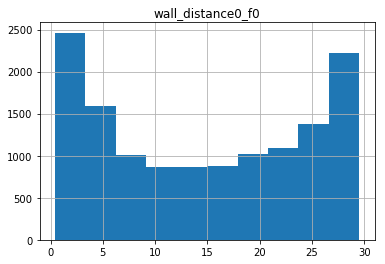

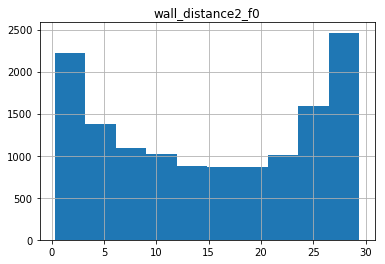

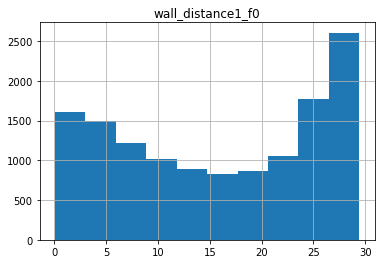

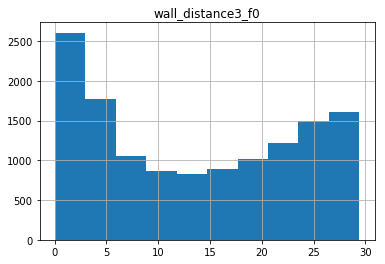

In [7]:
kicks.hist('wall_distance0_f0'), kicks.hist('wall_distance2_f0'), \
kicks.hist('wall_distance1_f0'), kicks.hist('wall_distance3_f0')

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b41489400>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3f0bd7b8>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3f04cb38>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3ef66e80>]], dtype=object))

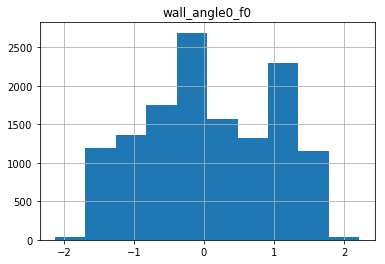

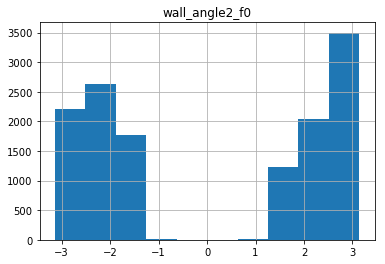

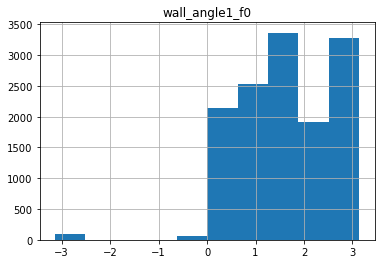

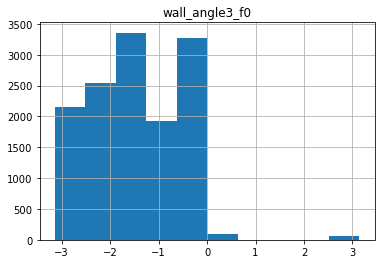

In [8]:
kicks.hist('wall_angle0_f0'), kicks.hist('wall_angle2_f0'), \
kicks.hist('wall_angle1_f0'), kicks.hist('wall_angle3_f0')

In [13]:
np.max(np.abs((kicks['wall_distance0_f0'] + kicks['wall_distance2_f0'])))

NameError: name 'kicks' is not defined

In [14]:
df_smooth = pd.read_csv('../../data/processed/cleaned_guy.csv')

In [15]:
(df_smooth.status == 'stopping').sum()

89

In [15]:
df_smooth.columns

Index(['acceleration_f0', 'angle_f0', 'angular_a_f0', 'angular_v_f0',
       'border_distance_f0', 'neighbor_distance', 'speed_f0',
       'speed_smooth_f0', 'vX_f0', 'vY_f0', 'x_f0', 'y_f0', 'time', 'frame',
       'acceleration_f1', 'angle_f1', 'angular_a_f1', 'angular_v_f1',
       'border_distance_f1', 'speed_f1', 'speed_smooth_f1', 'vX_f1', 'vY_f1',
       'x_f1', 'y_f1', 'acceleration_smooth_f0', 'acceleration_smooth_f1',
       'status'],
      dtype='object')

In [16]:
df_smooth.x_f0.min()

0.035712028599387435

In [21]:
from itertools import product

In [22]:
min(df_smooth['x_f0'].min(), df_smooth['x_f1'].min()),  \
max(df_smooth['x_f0'].max(), df_smooth['x_f1'].max()), \
min(df_smooth['y_f0'].min(), df_smooth['y_f1'].min()),  \
max(df_smooth['y_f0'].max(), df_smooth['y_f1'].max()), 


(0.035712028599387435,
 29.8564904940005,
 0.050993733613899035,
 29.51128992069982)

In [12]:
from segmentation import load_and_join, clean_dataset, smooth_dataset
BODY_LENGTH = 1.0 # cm
SWIMMING_THRESHOLD = 0.5/BODY_LENGTH
csv_path_0 = '../../data/raw/trial3_fish0.csv'
csv_path_1 = '../../data/raw/trial3_fish1.csv'
csv_cleaned = '../../data/processed/cleaned_guy.csv'
csv_kicks = '../../data/processed/kicks_guy.csv'

df = load_and_join(csv_path_0, csv_path_1)
print("Loading and joining done.")
df = clean_dataset(df)
print("Cleaned data.")


Loading and joining done.


/home/lukas/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:86: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


Cleaned data.


In [13]:
time = df['time']

cur_adj_time = 0.0 - 0.01
new_time = []
i = 0
valid = []
while(True):
    cur_adj_time = len(new_time) * 0.01
    
    if (time[i] - cur_adj_time) > 0.005:
        #print(time[i], cur_adj_time)
        #cur_adj_time -= 0.01
        new_time.append(cur_adj_time)
        valid.append(False)
        continue
    else:
        new_time.append(cur_adj_time)
        valid.append(True)
        
    i += 1
    if i >= len(time):
        break   
        
new_time = np.array(new_time)
valid = np.array(valid)

In [14]:
print(len(valid) - (np.array(valid)*1.0).sum())
print(len(time), len(new_time[np.array(valid)]))
print(np.linalg.norm(time - new_time[valid])/len(time))
print(np.median(np.abs((time - new_time[valid]))))
print(np.max(np.abs((time - new_time[valid]))))

216.0
365438 365438
4.8185160412e-06
0.00255370000002
0.0052340000002


In [15]:
new_index = pd.RangeIndex(0, len(new_time), step=1)
print(len(df))
# Prepare old data for new time
df.index = new_index[valid]
df['time'] = new_time[valid]

# Create frames for invalid entries (all NaN!)
invalid_frame = pd.DataFrame(index=new_index[~valid])
# Combine invalid frames and valid ones, recreate sorted index
df = df.append(invalid_frame).sort_index()
# Store which frames are valid, this is needed for the kick-segmentation later.
df['valid'] = True
df.loc[~valid, 'valid'] = False 
# Store correct time for invalid frames as well
df.loc[~valid, 'time'] = new_time[~valid]
print(len(df))

365438
365654


In [9]:
365438 - 365654

-216

In [41]:
dt = np.ediff1d(df.time)
dt.max(), dt.std(), ((df['valid'] == False)*1.0).sum()

(0.010000000000218279, 1.5307791605410335e-13, 216.0)

216.0